# Balancing Data — ENTSO-E Examples

Querying imbalance prices and volumes.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from entsoe import Client, country_name

client = Client()

## 1. Imbalance Prices — France (1 week)

In [2]:
start = "2024-06-01"
end = "2024-06-08"

df_prices = client.balancing.imbalance_prices(start, end, country="FR")
df_prices.head()

,timestamp,value,currency,price_unit,price_category
0,2024-05-31 22:00:00+00:00,0.44,EUR,MWH,Long
1,2024-05-31 22:00:00+00:00,0.50,EUR,MWH,Short
2,2024-05-31 22:30:00+00:00,6.27,EUR,MWH,Short
3,2024-05-31 22:30:00+00:00,5.51,EUR,MWH,Long
4,2024-05-31 23:00:00+00:00,8.46,EUR,MWH,Long


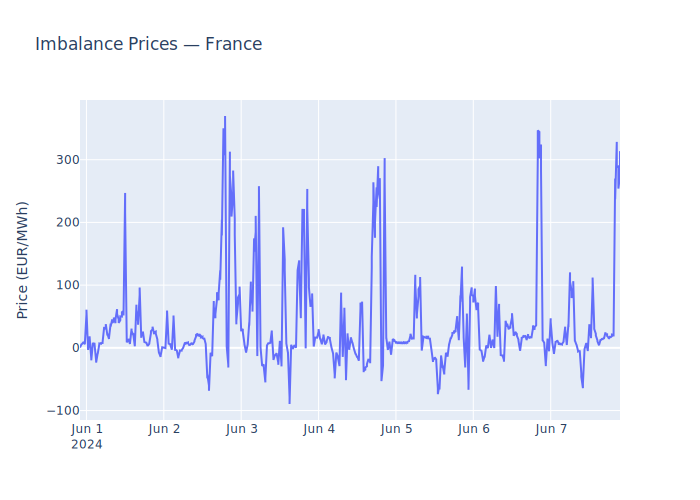

In [3]:
fig = px.line(
    df_prices, x="timestamp", y="value",
    title="Imbalance Prices — France",
    labels={"value": "Price (EUR/MWh)", "timestamp": ""},
)
fig.show()

## 2. Imbalance Prices — Multi-Country

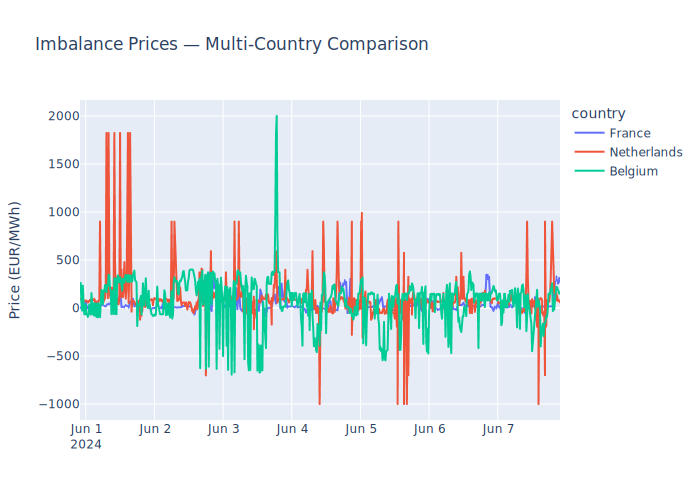

In [4]:
countries = ["FR", "NL", "BE"]
frames = []
for code in countries:
    df = client.balancing.imbalance_prices(start, end, country=code)
    df["country"] = country_name(code)
    frames.append(df)

df_multi = pd.concat(frames, ignore_index=True)

fig = px.line(
    df_multi, x="timestamp", y="value", color="country",
    title="Imbalance Prices — Multi-Country Comparison",
    labels={"value": "Price (EUR/MWh)", "timestamp": ""},
)
fig.show()

## 3. Price Distribution — Histogram

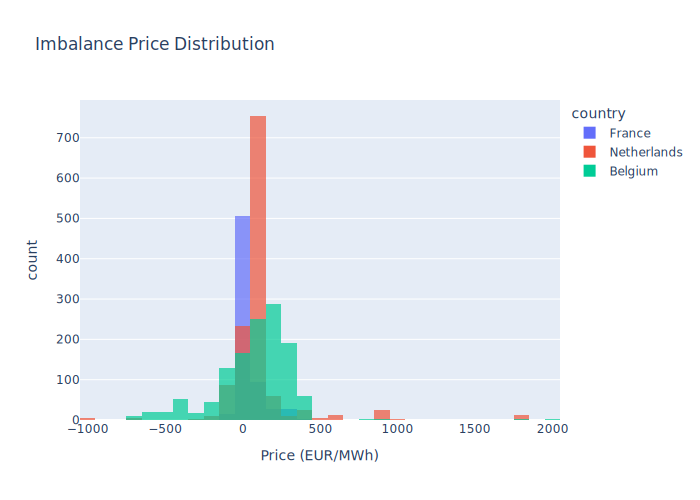

In [5]:
fig = px.histogram(
    df_multi, x="value", color="country", barmode="overlay",
    nbins=50, opacity=0.7,
    title="Imbalance Price Distribution",
    labels={"value": "Price (EUR/MWh)"},
)
fig.show()

## 4. Imbalance Prices vs Day-Ahead Prices

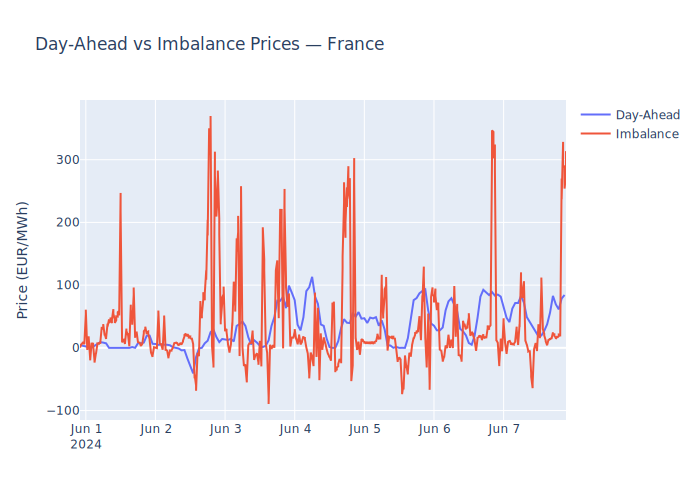

In [6]:
df_da = client.prices.day_ahead(start, end, country="FR")
df_imb = client.balancing.imbalance_prices(start, end, country="FR")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_da["timestamp"], y=df_da["value"],
    name="Day-Ahead", line=dict(color="#636EFA"),
))
fig.add_trace(go.Scatter(
    x=df_imb["timestamp"], y=df_imb["value"],
    name="Imbalance", line=dict(color="#EF553B"),
))
fig.update_layout(
    title="Day-Ahead vs Imbalance Prices — France",
    yaxis_title="Price (EUR/MWh)",
    xaxis_title="",
)
fig.show()